In [9]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def read_img(img,n):
    temp = Image.open(img)
    im_gray = temp.convert('L')
    
    x,y=temp.size
    size=[x/n,y/n]
    
    temp.thumbnail(size)
    im_gray.thumbnail(size)
    
    temp_1 = np.asarray(temp)
    im_gray=np.asarray(im_gray)
    
    #im = Image.fromarray(a)

    im_R = temp_1.copy()
    im_R[:, :, (1, 2)] = 0
    im_G = temp_1.copy()
    im_G[:, :, (0, 2)] = 0
    im_B = temp_1.copy()
    im_B[:, :, (0, 1)] = 0

    fig, ax = plt.subplots(1,5)
    ax[0].imshow(temp_1, cmap = 'gray',vmin=0, vmax=255)
    ax[1].imshow(im_R, cmap = 'gray',vmin=0, vmax=255)
    ax[2].imshow(im_G, cmap = 'gray',vmin=0, vmax=255)
    ax[3].imshow(im_B, cmap = 'gray',vmin=0, vmax=255)
    ax[4].imshow(im_gray, cmap = 'gray',vmin=0, vmax=255)
    fig.set_size_inches(20,10)
    
    
    return (temp_1,im_R,im_G,im_B,im_gray)

    

(24, 44) 1056 px
0 199


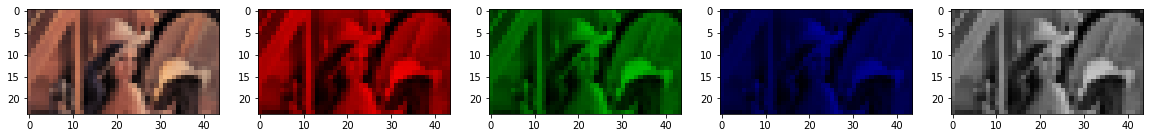

In [10]:
n=25 #sub division de la imagen principal 

d_1,d_2,d_3,d_4,d_5 = read_img('Lenna.jpg',n)

print(d_5.shape,d_5.size,'px')
print(d_5.min(),d_5.max())



In [11]:
import nengo
from nengo_extras.plot_spikes import (
    cluster, merge, plot_spikes, preprocess_spikes, sample_by_variance)

t=1

with nengo.Network(seed=1) as model:
    input = nengo.Node(output=d_5.tolist()[0]) 
    ens = nengo.Ensemble(10, len(d_5.tolist()[0]))
    nengo.Connection(input, ens)

    p = nengo.Probe(ens, synapse=0.01)
    p_spikes = nengo.Probe(ens.neurons, 'spikes')
    
    
sim = nengo.Simulator(model)
sim.run(t)

#Plot the spiking output of the ensemble
# plt.figure(figsize=(10, 8))
# plt.subplot(221)
# rasterplot(sim.trange(), sim.data[1])
# plt.ylabel("Neuron")
# plt.xlim(0, 1)



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

Text(0, 0.5, 'Neuron number')

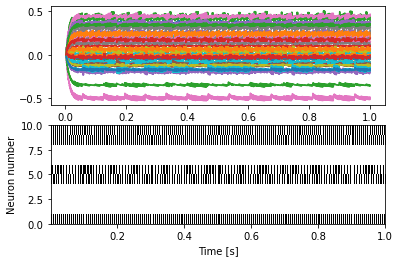

In [12]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(sim.trange(), sim.data[p])

plt.subplot(2, 1, 2)
plot_spikes(sim.trange(), sim.data[p_spikes])
plt.xlabel("Time [s]")
plt.ylabel("Neuron number")

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

(0.0, 1.0)

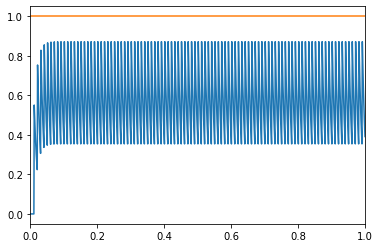

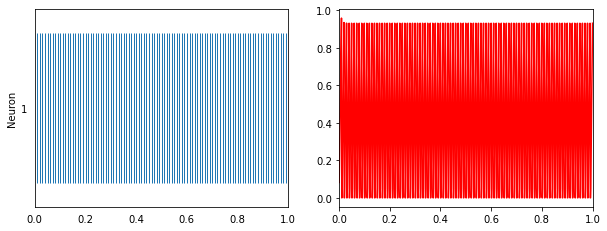

In [13]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.utils.matplotlib import rasterplot

from nengo.dists import Uniform

model = nengo.Network(label="A Single Neuron")
with model:
    neuron = nengo.Ensemble(
        1,
        dimensions=1,  # Represent a scalar
        # Set intercept to 0.5
        intercepts=Uniform(-0.5, -0.5),
        # Set the maximum firing rate of the neuron to 100hz
        max_rates=Uniform(100, 100),
        # Set the neuron's firing rate to increase for positive input
        encoders=[[1]],
    )

with model:
    cos = nengo.Node(output=1)
with model:
    # Connect the input signal to the neuron
    nengo.Connection(cos, neuron)
with model:
    # The original input
    cos_probe = nengo.Probe(cos)
    # The raw spikes from the neuron
    spikes = nengo.Probe(neuron.neurons)
    # Subthreshold soma voltage of the neuron
    voltage = nengo.Probe(neuron.neurons, "voltage")
    # Spikes filtered by a 10ms post-synaptic filter
    filtered = nengo.Probe(neuron, synapse=0.01)
with nengo.Simulator(model) as sim:  # Create the simulator
    sim.run(1)  # Run it for 1 second
# Plot the decoded output of the ensemble


plt.figure()
plt.plot(sim.trange(), sim.data[filtered])
plt.plot(sim.trange(), sim.data[cos_probe])
plt.xlim(0, 1)

# Plot the spiking output of the ensemble
plt.figure(figsize=(10, 8))
plt.subplot(221)
rasterplot(sim.trange(), sim.data[spikes])
plt.ylabel("Neuron")
plt.xlim(0, 1)

# Plot the soma voltages of the neurons
plt.subplot(222)
plt.plot(sim.trange(), sim.data[voltage][:, 0], "r")
plt.xlim(0, 1)



HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

(0.0, 1.0)

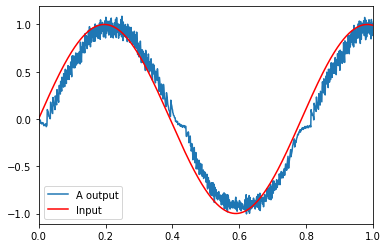

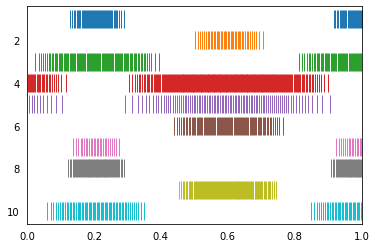

In [14]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.utils.ensemble import sorted_neurons
from nengo.utils.matplotlib import rasterplot

model = nengo.Network(label="Many Neurons")
with model:
    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal
    A = nengo.Ensemble(10, dimensions=1)
    
with model:
    sin = nengo.Node(lambda t: np.sin(8 * t))  # Input is a sine

with model:
    # Connect the input to the population
    nengo.Connection(sin, A, synapse=0.01)  # 10ms filter
with model:
    sin_probe = nengo.Probe(sin)
    A_probe = nengo.Probe(A, synapse=0.01)  # 10ms filter
    A_spikes = nengo.Probe(A.neurons)  # Collect the spikes

# Create our simulator
with nengo.Simulator(model) as sim:
    # Run it for 1 second
    sim.run(1)
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="A output")
plt.plot(sim.trange(), sim.data[sin_probe], "r", label="Input")
plt.xlim(0, 1)
plt.legend()

# Plot the spiking output of the ensemble
plt.figure()
rasterplot(sim.trange(), sim.data[A_spikes])
plt.xlim(0, 1)
